In [1]:
import math
import numpy as np
import pyscsp
from matplotlib import pyplot as plt
from importlib import reload

In [2]:
# Create a discrete delta function to illustrate impulse responses
delta = pyscsp.discscsp.deltafcn(65,65)

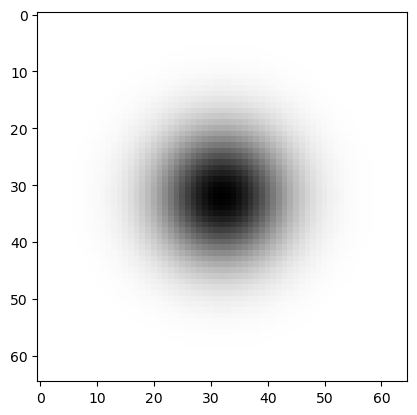

In [3]:
# The discrete Gaussian kernel is the default choice for spatial smoothing
L = pyscsp.discscsp.computeNjetfcn(delta, 'L', 8)
plt.imshow(-L, cmap='gray', interpolation='nearest')

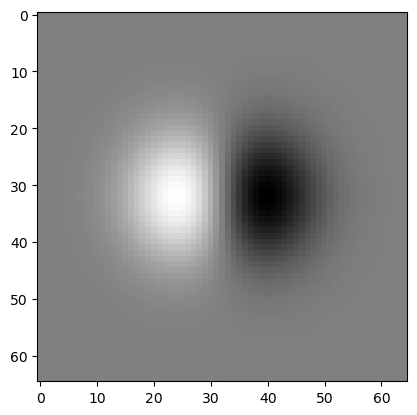

In [4]:
# First-order discrete derivative approximation kernel in the x-direction
Lx = pyscsp.discscsp.computeNjetfcn(delta, 'Lx', 8)
plt.imshow(Lx, cmap='gray', interpolation='nearest')

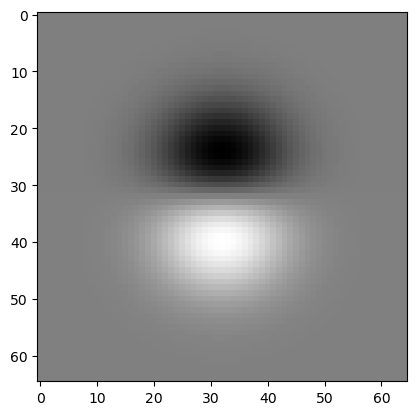

In [5]:
# First-order discrete derivative approximation kernel in the y-direction
Ly = pyscsp.discscsp.computeNjetfcn(delta, 'Ly', 8)
plt.imshow(Ly, cmap='gray', interpolation='nearest')

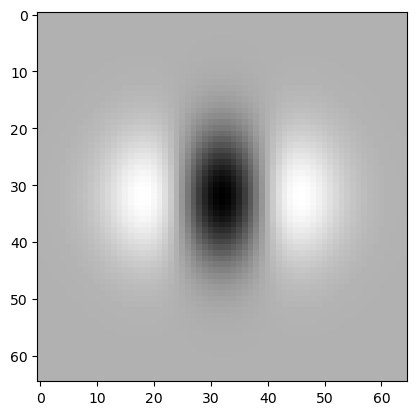

In [6]:
# Second-order discrete derivative approximation kernel in the x-direction
Lxx = pyscsp.discscsp.computeNjetfcn(delta, 'Lxx', 8)
plt.imshow(Lxx, cmap='gray', interpolation='nearest')

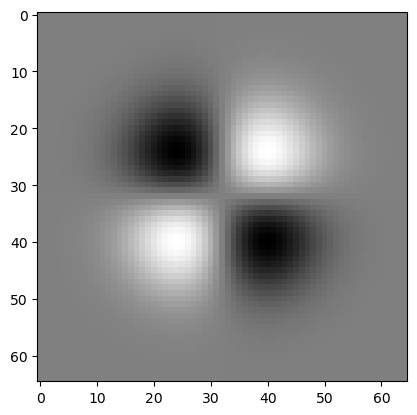

In [7]:
# Mixed second-order discrete derivative approximation kernel in the x- and y-directions
Lxy = pyscsp.discscsp.computeNjetfcn(delta, 'Lxy', 8)
plt.imshow(Lxy, cmap='gray', interpolation='nearest')

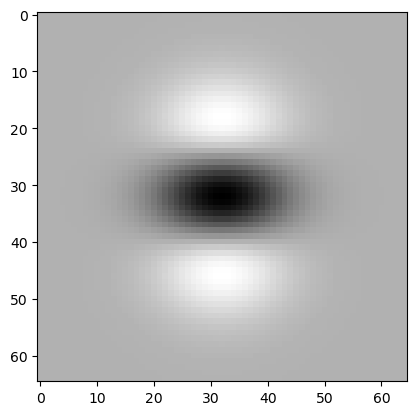

In [8]:
# Second-order discrete derivative approximation kernel in the y-direction
Lyy = pyscsp.discscsp.computeNjetfcn(delta, 'Lyy', 8)
plt.imshow(Lyy, cmap='gray', interpolation='nearest')

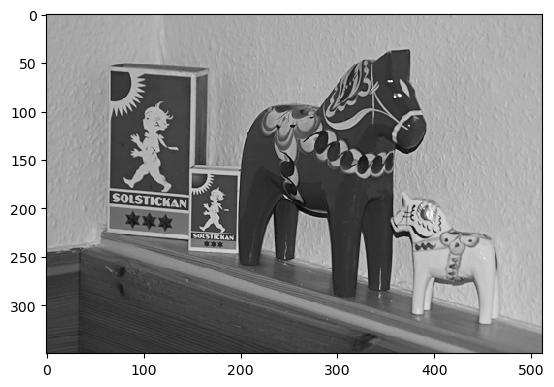

In [9]:
# Read a colour image and convert to grey-levels for further testing purposes
dala = pyscsp.discscsp.RGB2L(plt.imread('testimages/dalahast.jpg')/1)
plt.imshow(dala, cmap='gray', interpolation='nearest')

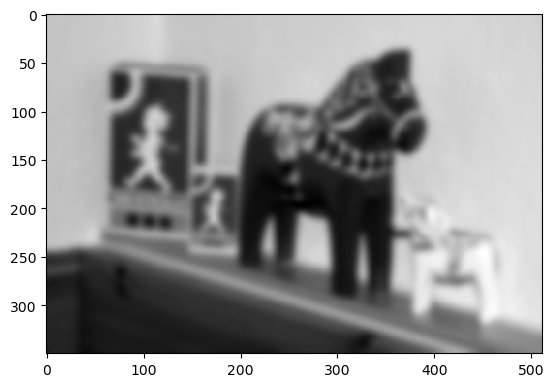

In [10]:
# Discrete scale-space representation at scale 4
L = pyscsp.discscsp.computeNjetfcn(dala, 'L', 4)
plt.imshow(L, cmap='gray', interpolation='nearest')

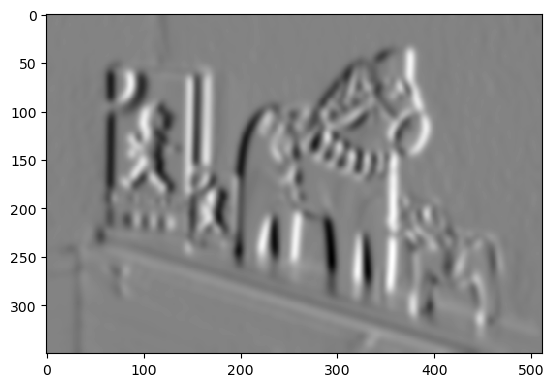

In [11]:
# The first-order derivative in the x-direction at scale 4
Lx = pyscsp.discscsp.computeNjetfcn(dala, 'Lx', 4)
plt.imshow(Lx, cmap='gray', interpolation='nearest')

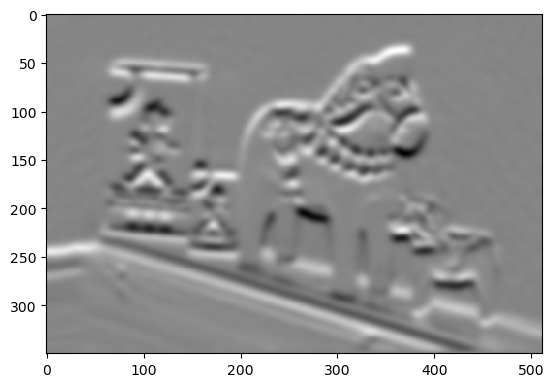

In [12]:
# The first-order derivative in the y-direction at scale 4
Ly = pyscsp.discscsp.computeNjetfcn(dala, 'Ly', 4)
plt.imshow(Ly, cmap='gray', interpolation='nearest')

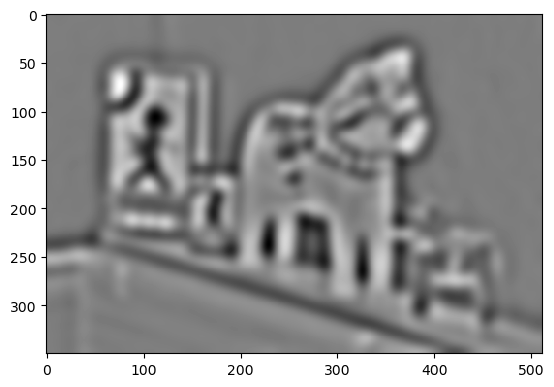

In [13]:
# The Laplacian response at scale 8
Laplace = pyscsp.discscsp.computeNjetfcn(dala, 'Laplace', 8)
plt.imshow(Laplace, cmap='gray', interpolation='nearest')

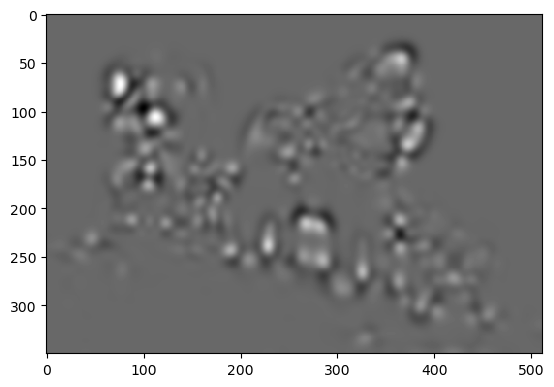

In [14]:
# The determinant of the Hessian at scale 8
detHessian = pyscsp.discscsp.computeNjetfcn(dala, 'detHessian', 8)
plt.imshow(detHessian, cmap='gray', interpolation='nearest')

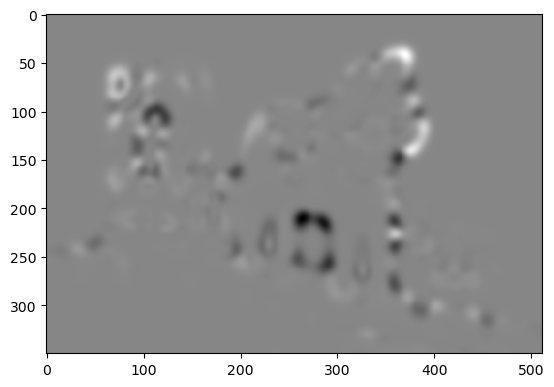

In [15]:
# The rescaled level curve curvature at scale 8
Kappa = pyscsp.discscsp.computeNjetfcn(dala, 'Kappa', 8)
plt.imshow(Kappa, cmap='gray', interpolation='nearest')

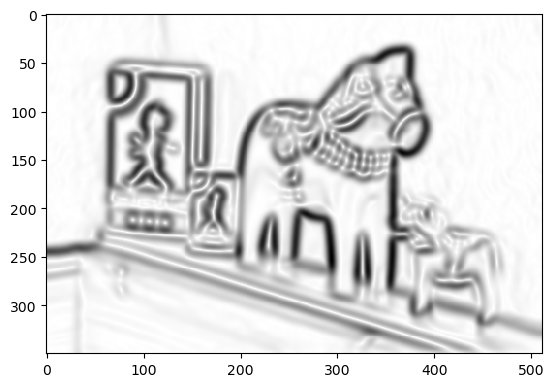

In [16]:
# The gradient magnitude at scale 4
Lv = pyscsp.discscsp.computeNjetfcn(dala, 'Lv', 4)
plt.imshow(-Lv, cmap='gray', interpolation='nearest')

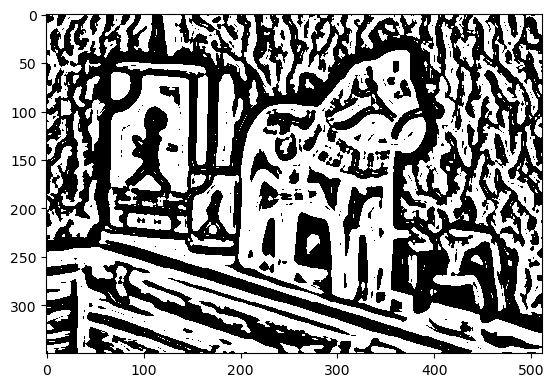

In [17]:
# The second-order directional derivative in the gradient direction multiplied by the square gradient magnitude
Lv2Lvv = pyscsp.discscsp.computeNjetfcn(dala, 'Lv2Lvv', 4)
plt.imshow(Lv2Lvv > 0, cmap='gray', interpolation='nearest')
# A subset of zero-crossings of this function are the differential edges at this scale

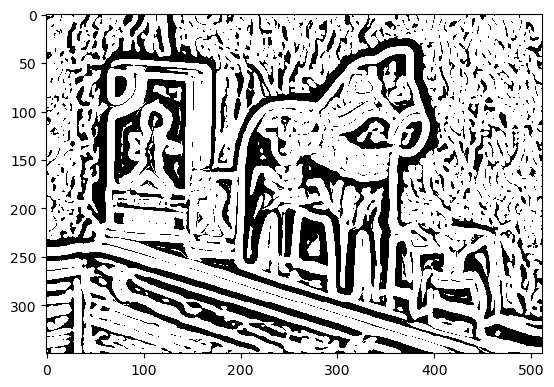

In [18]:
# The third-order directional derivative in the gradient direction multiplied by the gradient magnitude^3
Lv3Lvvv = pyscsp.discscsp.computeNjetfcn(dala, 'Lv3Lvvv', 4)
plt.imshow(Lv3Lvvv < 0, cmap='gray', interpolation='nearest')
# The regions where this entity is negative constitute masks for the differential edges above

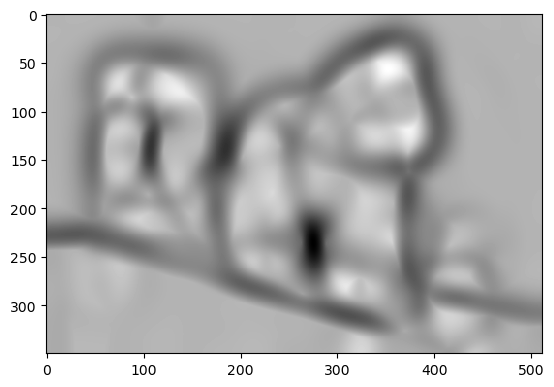

In [19]:
# The second-order directional derivative in the first principal curvature direction
# (used for detecting bright ridges)
Lpp = pyscsp.discscsp.computeNjetfcn(dala, 'Lpp', 16)
plt.imshow(Lpp, cmap='gray', interpolation='nearest')

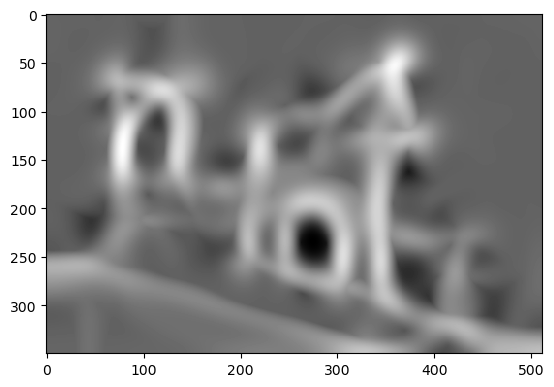

In [20]:
# The second-order directional derivative in the second principal curvature direction
# (used for detecting dark valleys)
Lqq = pyscsp.discscsp.computeNjetfcn(dala, 'Lqq', 16)
plt.imshow(Lqq, cmap='gray', interpolation='nearest')

In [21]:
# Generate a discrete delta function for testing the variances of
# of the impulse responses for the different types of discrete
# approximations of the Gaussian smoothing operation
#
# Note that the variance of the impulse responses should ideally
# be equal to the square of the sigma value (the standard deviation)
delta255 = pyscsp.discscsp.deltafcn(255,255)

In [22]:
# The discrete Gaussian kernel gives the correct variance for all scales, up to numerical errors
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1/3, 'discgauss'))

NameError: name 'discscsp' is not defined

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1, 'discgauss'))

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 10, 'discgauss'))

In [ ]:
# The sampled Gaussian gives too small variances at fine scales, while
# quite reasonable variances at coarser scales
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1/3, 'normsamplgauss'))

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1, 'normsamplgauss'))

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 10, 'normsamplgauss'))

In [ ]:
# The integrated Gaussian kernel gives somewhat better variances than the
# sampled Gaussian kernel at finer scales, but adds an offset at coarser scales
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1/3, 'intgauss'))

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 1, 'intgauss'))

In [ ]:
pyscsp.discscsp.variance(discscsp.scspconv(delta255, 10, 'intgauss'))

In [ ]:
coldala = plt.imread('testimages/dalahast.jpg')
plt.imshow(coldala)

In [ ]:
# The scale-space smoothing operation works also for colour images
smoothpic = pyscsp.discscsp.scspconv(coldala, 4)
plt.imshow(smoothpic/255)

In [ ]:
# Some of the Njet-functions are also meaningful to compute from colour images,
# although their visualization may be less immediate
colLx = pyscsp.discscsp.computeNjetfcn(coldala, 'Lx', 4)
plt.imshow(colLx/255)

In [ ]:
# Computing colour-opponent receptive field responses, corresponding to double-opponent receptive fields
coloppLaplace = pyscsp.discscsp.computeNjetfcn(discscsp.RGB2LUV(coldala), 'Laplace', 16)
plt.imshow(coloppLaplace/255)

In [ ]:
# First-order directional derivative in the direction pi/6
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphi = pyscsp.discscsp.applydirder(L, math.pi/6, 1, 0)
plt.imshow(Lphi, cmap='gray', interpolation='nearest')

In [ ]:
# Second-order directional derivative in the direction pi/6
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphi = pyscsp.discscsp.applydirder(L, math.pi/6, 2, 0)
plt.imshow(Lphi, cmap='gray', interpolation='nearest')

In [ ]:
# Third-order directional derivative in the direction pi/6
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphi = pyscsp.discscsp.applydirder(L, math.pi/6, 3, 0)
plt.imshow(Lphi, cmap='gray', interpolation='nearest')

In [ ]:
# Fourth-order directional derivative in the direction pi/6
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphi = pyscsp.discscsp.applydirder(L, math.pi/6, 4, 0)
plt.imshow(Lphi, cmap='gray', interpolation='nearest')

In [ ]:
# Mixed second-order directional derivative in the directions 
# parallel and orthogonal to pi/6
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphiorth = pyscsp.discscsp.applydirder(L, math.pi/6, 1, 1)
plt.imshow(Lphiorth, cmap='gray', interpolation='nearest')

In [ ]:
# Mixed third-order directional derivative, corresponding to a second-order
# directional derivative the direction pi/6, and a first-order directional 
# derivative in the orthogonal direction
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphiphiorth = discscsp.applydirder(L, math.pi/6, 2, 1)
plt.imshow(Lphiphiorth, cmap='gray', interpolation='nearest')

In [ ]:
# Mixed third-order directional derivative, corresponding to a first-order
# directional derivative the direction pi/6, and a second-order directional 
# derivative in the orthogonal direction
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphiorthorth = pyscsp.discscsp.applydirder(L, math.pi/6, 1, 2)
plt.imshow(Lphiorthorth, cmap='gray', interpolation='nearest')

In [ ]:
# Mixed fourth-order directional derivative, corresponding to a third-order
# directional derivative the direction pi/6, and a first-order directional 
# derivative in the orthogonal direction
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphiphiphiorth = pyscsp.discscsp.applydirder(L, math.pi/6, 3, 1)
plt.imshow(Lphiphiphiorth, cmap='gray', interpolation='nearest')

In [ ]:
# Mixed fourth-order directional derivative, corresponding to a second-order
# directional derivative the direction pi/6, and a second-order directional 
# derivative in the orthogonal direction
delta = pyscsp.discscsp.deltafcn(65,65)
L = pyscsp.discscsp.scspconv(delta, 8)
Lphiphiorthorth = pyscsp.discscsp.applydirder(L, math.pi/6, 2, 2)
plt.imshow(Lphiphiorthorth, cmap='gray', interpolation='nearest')